# Банки - анализ оттока клиентов

<div style="border:solid green 3px; padding: 20px; border-radius: 10px">
<b>Цель проекта:</b>

Анализ оттока клиентов банка для разработки мероприятий по их удержанию    

<b>Задачи проекта:</b>
- Определить основные характеристики клиентов, уходящих из банка
- На основе выделенных критериев сформировать сегменты пользователей, наиболее склонных к оттоку
- Дать рекомендации по мероприятиям удержания клиентов из выделенных сегментов    

<b>Ход исследования:</b>
    
    
Информация для анализа будет получена из датасета, содержащего данные о клиентах банка. Для начала будут проведены обзор данных и их предобработка. Затем будут выделены основные значения признаков клиентов в разрезе оттока, определены взаимосвязи данных признаков, и сформированы портреты пользователей по признаку оттока. Различия в отдельных показателях между лояльными и отточными пользователями будут проверены статистически.  Далее будут определены сегменты клиентов банка, наиболее склонных к уходу, данные сегменты будут приоритизированы и по каждому из сегментов будут предложены мероприятия по удержанию пользователей.

    
Таким образом, исследование пройдет в ***восемь этапов***:    
      
* Загрузка и описание данных
* Предобработка данных    
* Исследовательский анализ данных, в том числе корреляционный анализ    
* Проверка статистических гипотез   
* Выводы по результатам исследовательского анализа, корреляционного анализа и проверки статистических гипотез    
* Сегментация клиентов, которые склонны уходить из банка   
* Приоритизация сегментов  
* Рекомендации по работе с сегментами      

## Загрузка и описание данных

In [1]:
# импорт библиотек
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
!pip install phik 
import phik

In [2]:
# загрузка данных
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
# вывод на экран пяти первых строк датасета
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
# вывод на экран общей информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

Данные для анализа содержат информацию о 10 тысячах клиентов банка. В датасете представлены следующие характеристики пользователей:    
- Пол     
- Возраст    
- Город    
- Кредитный рейтинг    
- Баланс счета    
- Количество используемых продуктов банка    
- Количество баллов собственности    
- Наличие кредитной карты    
- Активность клиента    
- Оценочный доход клиента    
- Признак оттока

## Предобработка данных для анализа

Для удобства переименуем наименования колонок датасета, приведя их к нижнему регистру.

In [5]:
# переименование названий колонок
df.columns = df.columns.str.lower()

Проверим данные на наличие дубликатов по строкам в целом и по id пользователей.

In [6]:
# вывод количества задублированных строк
print('Количество задублированных строк в данных: ', df.duplicated().sum())
# вывод количества задублированных id пользователей
print('Количество задублированных пользователей в данных: ', df['userid'].duplicated().sum())

Количество задублированных строк в данных:  0
Количество задублированных пользователей в данных:  73


Явных дубликатов в данных не обнаружено, но есть неявные. В датасете имеются пользователи с одинаковыми id. Выведем на экран данные о задублированных пользователях.

In [7]:
pd.set_option('display.max_rows', None)
# вывод данных о пользователях с задублированным id
ids = df['userid']
dupls = df[ids.isin(ids[ids.duplicated()])].sort_values('userid')
dupls

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Как видно из представленной таблицы, под одним и тем же id пользователя находятся совершенно разные клиенты банка (из разных городов и возрастных групп). Что примечательно, по каждому задублированному id пользователя один клиент из Рыбинска, другой из Ярославля. Скорее всего, присутствует некий технический момент в дублировании id пользователей и это не связано с корректностью информации по остальным колонкам по данным пользователям. Поэтому информацию о пользователях с задублированным id предлагаем оставить в данных для дальнейшего анализа.

Далее исследуем пропущенные значения в датасете и возможности замены пропусков.

In [8]:
#отображение количества и процента пропущенных значений по каждому столбцу датафрейма
na_counts = pd.DataFrame(df.isna().sum())
na_counts['%'] = round(df.isna().mean()*100,1)
na_counts.columns = ['count', '%']
na_counts.style.background_gradient(cmap='PuBu', subset='%')

,count,%
userid,0,0.000000
score,0,0.000000
city,0,0.000000
gender,0,0.000000
age,26,0.300000
equity,0,0.000000
balance,2295,23.000000
products,0,0.000000
credit_card,0,0.000000
last_activity,0,0.000000


Всего 26 (0,3%) пропущенных значения в информации о возрасте. Строки, в которых пропущена информация о возрасте, удалим.

In [9]:
#удаление строк, в которых пропущены значения по столбцу 'age'
df=df.dropna(subset=['age'])

Много пропущенных значений (23% всех записей) наблюдается по колонке 'balance', отражающей информацию о балансе счета пользователей. Чтобы понимать, как обработать пропущенные значения, определим природу пропусков. Для этого проанализируем, какие признаки пользователей наиболее характерны для строк с пропусками по колонке 'balance'. Построим сводную таблицу с группировкой по наличию или отсутствию пропусков по колонке 'balance'. При этом выведем средние значения заработной платы, возраста пользователей и их кредитного рейтинга, медианные значения количества продуктов и количества объектов собственности, а также наиболее часто встречающиеся значения по столбцам: город, пол, наличие кредитной карты, активность и  показатель оттока.

In [10]:
# прописываем функцию для категоризации по наличию пропусков в данных о балансе
def na_values(balance):
    if type(balance) == float and pd.isna(balance):
        return 'Значение пропущено'
    else:
        return 'Значение не пропущено'
# создаем новый столбец, применив функцию
df['na_balance'] = df['balance'].apply(na_values)
# группируем данные
na_bal_num = df.groupby('na_balance').agg({'est_salary':'mean', 'age':'mean', 'products':'median', 'equity':'median', 'score': 'mean'})
na_bal_cat = df.groupby('na_balance')[['city', 'gender', 'credit_card', 'last_activity', 'churn']].agg(lambda x:x.value_counts().index[0])
na_bal_num.merge(na_bal_cat, on = 'na_balance')

,est_salary,age,products,equity,score,city,gender,credit_card,last_activity,churn
na_balance,,,,,,,,,,
Значение не пропущено,124520.394264,42.924366,2.0,4.0,843.744120,Ярославль,Ж,1,1,0
Значение пропущено,226345.417464,42.093023,1.0,0.0,865.357174,Ярославль,М,1,1,0


Как видно из полученной таблицы, все пользователи (или основная часть пользователей), у которых пропущено значение по графе "баланс", не имеют объектов собственности при том, что у пользователей без пропусков в балансе медианное значение количества объектов собственности равно 4. Это дает основание предположить, что существует взаимосвязь между количеством объектов собственности и наличием пропусков в столбце "баланс".      
Кроме того, у пользователей без пропусков по балансу медианное количество продуктов равно 2, а у клиентов с пропусками. Поэтому количество продуктов также может быть связан с наличием пропусков в балансе. Рассчитаем коэффициент корреляции между показателем количества объектов собственности и наличием пропусков в балансе (если есть пропуск выведем значение 1, если нет - значение 0), а также коэффициент корреляции между количеством продуктов и наличием пропусков по балансу. 

In [11]:
# изменим значениия в столбце 'na_balance' на 1 и 0
df['na_balance'].replace({'Значение пропущено': 1, 'Значение не пропущено' : 0}, inplace=True)
# рассчитаем коэффициенты корреляции
print('Корреляция между количеством объектов собственности и пропусками в балансе:', round(df['na_balance'].corr(df['equity']),3))
print('Корреляция между количеством продуктов и пропусками в балансе:', round(df['na_balance'].corr(df['products']),3))

Корреляция между количеством объектов собственности и пропусками в балансе: -0.709
Корреляция между количеством продуктов и пропусками в балансе: -0.486


Согласно шкале Чеддока такое значение корреляции между количеством объектов собственности и пропусками в балансе можно охарактеризовать как высокое, между количеством продуктов и пропусками в балансе как умеренное. Таким образом, зависимость между количеством объектов собственности, количеством продуктов и наличием пропусков по графе "Баланс" подтверждена. Значит тип пропусков в данном столбце можно охарактеризовать как MNAR, их наличие не случайно, а зависит от значений в столбцах с количеством объектов собственности и количеством продуктов. Заменим пропущенные значения в столбце "Баланс" медианными значениями среди пользователей с такими же значениями признаков "количество объектов собственности" и "количество продуктов".

In [12]:
# замена пропущенных значений медианными в разрезе: количество объектов собственности/продуктов
df['balance'] = df['balance'].fillna(df.groupby(['equity', 'products'])['balance'].transform('median'))

Следующим шагом в предобработке данных является изучение типов данных в столбцах и их преобразование (при необходимости). В столбцах с возрастом пользователей и кредитным скорингом тип данных "число с плавающей точкой", изменим его на целочисленный формат.

In [13]:
# изменение типа данных на целое число
df['age'] = df['age'].astype('int')
df['score'] = df['score'].astype('int')

Последним шагом в предобработке данных является поиск и устранение аномалий в столбцах датасета. Для этого обратимся к методу describe().

In [14]:
# вывод статистической информации о столбцах таблицы с числовыми данными
pd.options.display.float_format='{:20,.2f}'.format 
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,na_balance
count,"9,974.00","9,974.00","9,974.00","9,974.00","9,973.00","9,974.00","9,974.00","9,974.00","9,974.00","9,974.00","9,974.00"
mean,"171,755.22",848.68,42.73,2.63,"668,402.41",1.87,0.68,0.52,"147,786.81",0.18,0.23
std,"33,695.53",65.40,12.18,1.98,"1,763,839.28",0.79,0.47,0.50,"139,285.51",0.39,0.42
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00,0.00
25%,"142,760.00",802.00,33.00,0.00,"129,005.68",1.00,0.00,0.00,"75,251.66",0.00,0.00
50%,"172,643.00",853.00,40.00,3.00,"376,312.14",2.00,1.00,1.00,"119,626.79",0.00,0.00
75%,"201,163.75",900.00,51.00,4.00,"804,483.38",2.00,1.00,1.00,"174,499.81",0.00,0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00,1.00


Как видно из статистической информации о датасете, есть пользователи, у которых количество банковских продуктов равно нулю. Выведем информацию о таких пользователях.

In [15]:
# вывод данных о пользователях с количеством банковских продуктов, равным нулю
df.loc[df['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,na_balance
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.96",1,1


Всего один пользователь с отсутствием продуктов, что противоречит логике обслуживания в банке. Скорее всего, это ошибка в данных, поэтому информацию о таком пользователе из датасета удалим.

In [16]:
# удаление данных о пользователе с 0 продуктов из датасета
df=df.loc[df['products'] != 0]

Других явных аномалий в числовых данных не выявлено. Так, например, значения в графе ‘возраст’ находятся в границах от 18 до 86 лет, что вполне соответствует возрастным ограничениям по обслуживанию в банках.

Проверим проведенные в ходе предобработки данных преобразования, получив общую информацию о датасете.

In [17]:
# вывод на экран общей информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9973 non-null   int64  
 1   score          9973 non-null   int32  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int32  
 5   equity         9973 non-null   int64  
 6   balance        9973 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
 12  na_balance     9973 non-null   int64  
dtypes: float64(2), int32(2), int64(7), object(2)
memory usage: 1012.9+ KB


<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
    
В ходе предобработки данных была проведена проверка корректности названий колонок и их переименование.  
    
Явных дубликатов в данных обнаружено не было, но были выявлены неявные дубликаты - задублированы некоторые значения идентификаторов пользователей. В связи с тем, что данные по пользователям в остальных колонках выглядят корректными, было принято решение строки с задублированными id пользователей не удалять. 
    
Также были выявлены столбцы с пропусками в значениях. Около 0,3% пропусков значений в столбце с возрастом пользователей, строки с такими данными были удалены. Кроме того, было обнаружено большое количество пропусков (23%) в значениях баланса клиентов. При более детальном анализе было определено, что пропуски по данному столбцу имеют связь со значениями количества объектов собственности и продуктов. В связи с этим пропущенные значения по столбцу 'balance' были заменены на медианные значения баланса по пользователям с таким же количеством объектов собственности и продуктов.   
    
В некоторых столбцах (возраст, кредитный скоринг) тип данных был для удобства заменен на целое число.   
    
При проверке аномалий в данных было выявлено, что у одного пользователя нет продуктов. Информация о таком пользователе была удалена из данных.
    

## Исследовательский анализ данных

Для начала проанализируем, какая доля пользователей уходят из банка, построив круговую диаграмму.

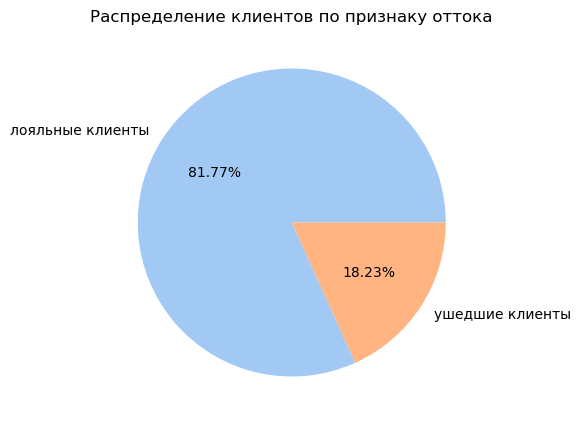

In [18]:
# подготовка исходных данных
df_churn = df.groupby('churn')['userid'].count().reset_index()
df_churn['churn'].replace({1: 'ушедшие клиенты', 0 : 'лояльные клиенты'}, inplace=True)
# построение круговой диаграммы
plt.figure(figsize=(12, 5))
color = sns.color_palette('pastel') 
plt.pie(df_churn['userid'], labels=df_churn['churn'], colors=color, autopct='%.2f%%') 
plt.title('Распределение клиентов по признаку оттока')  
plt.show() 

Около **18%** клиентов уходят из банка. Проанализируем, как доля ушедших клиентов распределяется по признакам пользователей для выделения сегментов пользователей с наибольшим показателем оттока.

Для начала определим, какая доля пользователей услуг банка уходит в зависимости от пола. Построим столбчатую диаграмму, отражающую долю ушедших пользователей среди мужчин и женщин. Также выведем линию со средним уровнем оттока по банку, для оценки того, с каким значением анализируемого признака пользователи чаще всего уходят из банка.

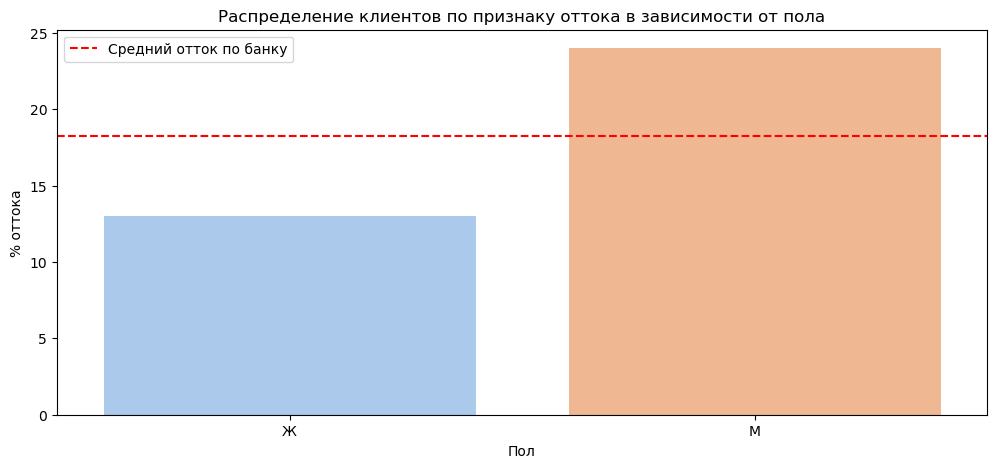

In [19]:
# готовим исходные данные
df_g = df.pivot_table(index='gender', columns='churn', values='userid', aggfunc='count').reset_index()
df_g['total'] = df_g[1] + df_g[0]
df_g['% оттока'] = round(df_g[1] / df_g['total']*100)
# вводим переменную уровня оттока по банку в целом
churn_rate = round(df['churn'].sum()/df['churn'].count()*100,2)
churn_rate
# строим диаграмму
sns.set_palette('pastel') 
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='gender', y='% оттока', data=df_g)
# вывод линии уровня среднего оттока по банку
plt.axhline (y=churn_rate, color='red', linestyle='--', label='Средний отток по банку')
plt.title('Распределение клиентов по признаку оттока в зависимости от пола')
plt.xlabel('Пол')
plt.legend(loc = 'upper left')
plt.show() 

**Мужчины** более склонны уходить из банка, чем женщины.     
Далее проанализируем, в каких городах уровень оттока выше, построив столбчатую диаграмму и выведя линию среднего оттока.

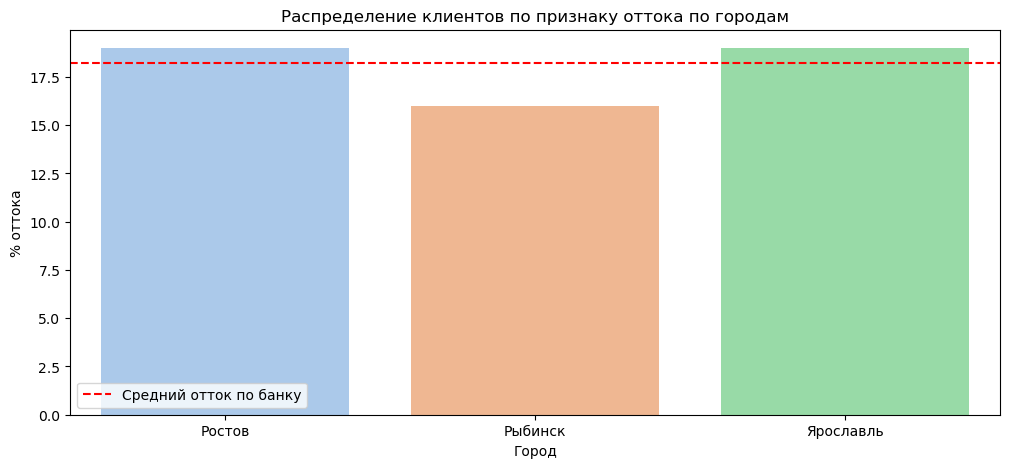

In [20]:
# готовим исходные данные
df_c = df.pivot_table(index='city', columns='churn', values='userid', aggfunc='count').reset_index()
df_c['total'] = df_c[1] + df_c[0]
df_c['% оттока'] = round(df_c[1] / df_c['total']*100)
# строим диаграмму
sns.set_palette('pastel') 
plt.figure(figsize=(12, 5))
# вывод линии уровня среднего оттока по банку
ax = sns.barplot(x='city', y='% оттока', data=df_c)
plt.axhline (y=churn_rate, color='red', linestyle='--', label='Средний отток по банку')
plt.title('Распределение клиентов по признаку оттока по городам')
plt.xlabel('Город')
plt.legend(loc = 'lower left')
plt.show() 

Клиенты из **Ростова и Ярославля** более склонны к уходу из банка, а вот в Рыбинске пользователи более лояльны.     
Рассмотрим, как распределены доли отточных клиентов в зависимости от наличия у них кредитной карты. Построим столбчатую диаграмму и линию среднего оттока.

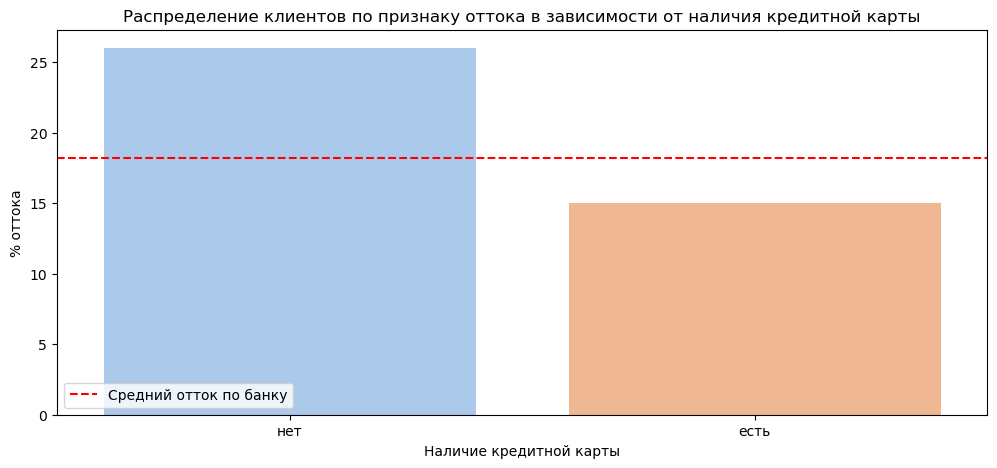

In [21]:
# готовим исходные данные
df_cc = df.pivot_table(index='credit_card', columns='churn', values='userid', aggfunc='count').reset_index()
df_cc['total'] = df_cc[1] + df_cc[0]
df_cc['% оттока'] = round(df_cc[1] / df_cc['total']*100)
df_cc['credit_card'].replace({1: 'есть', 0 : 'нет'}, inplace=True)
# строим диаграмму
sns.set_palette('pastel') 
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='credit_card', y='% оттока', data=df_cc)
# вывод линии уровня среднего оттока по банку
plt.axhline (y=churn_rate, color='red', linestyle='--', label='Средний отток по банку')
plt.title('Распределение клиентов по признаку оттока в зависимости от наличия кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.legend(loc = 'lower left')
plt.show() 

Клиенты, **не имеющие кредитных карт** чаще уходят из банка, чем те, у кого они есть.    
Проанализируем, как распределяются доли пользователей по признаку оттока в зависимости от активности, с помощью столбчатой диаграммы и уровня среднего оттока по банку.

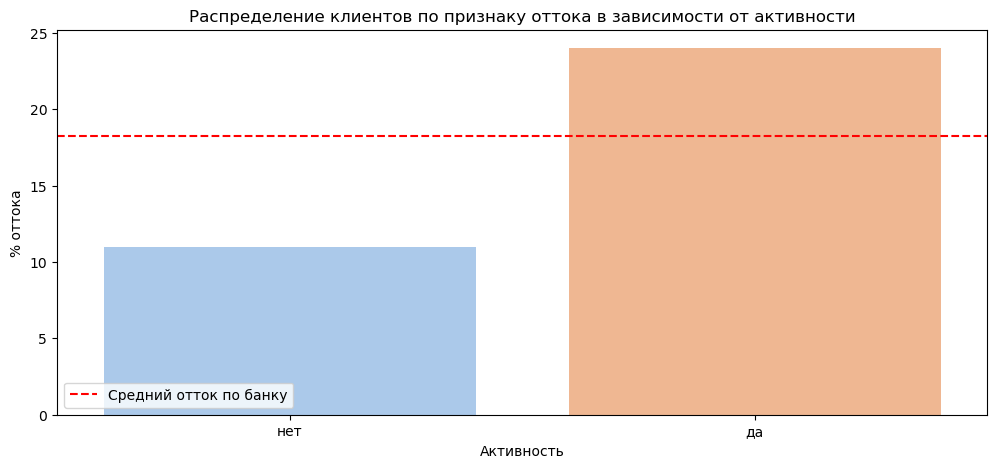

In [22]:
# готовим исходные данные
df_a = df.pivot_table(index='last_activity', columns='churn', values='userid', aggfunc='count').reset_index()
df_a['total'] = df_a[1] + df_a[0]
df_a['% оттока'] = round(df_a[1] / df_a['total']*100)
df_a['last_activity'].replace({1: 'да', 0 : 'нет'}, inplace=True)
# строим диаграмму
sns.set_palette('pastel') 
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='last_activity', y='% оттока', data=df_a)
# вывод линии уровня среднего оттока по банку
plt.axhline (y=churn_rate, color='red', linestyle='--', label='Средний отток по банку')
plt.title('Распределение клиентов по признаку оттока в зависимости от активности')
plt.xlabel('Активность')
plt.legend(loc = 'lower left')
plt.show() 

Более **активные** пользователи чаще уходят из банка. Возможно, активность связана с закрытием счетов и выводом средств перед уходом.   
Следующим шагом определим, как распределяется доля уходящих пользователей в зависимости от количества банковских продуктов.

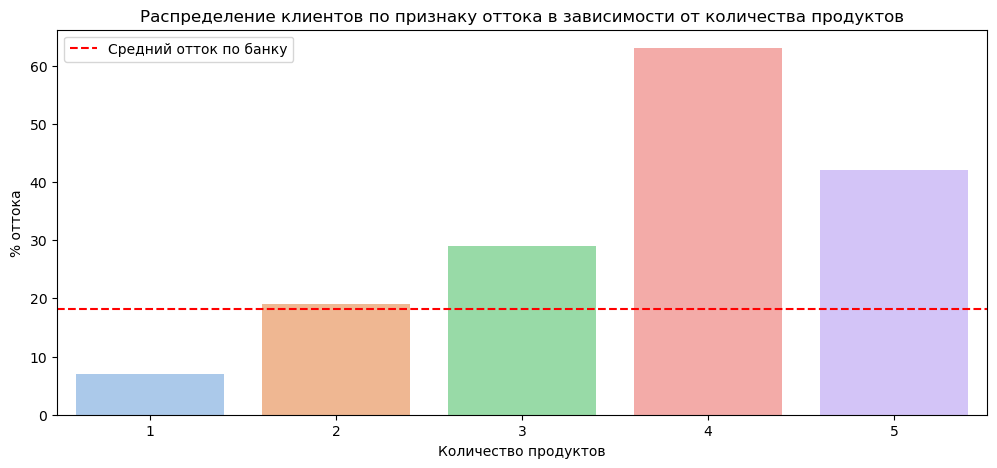

In [23]:
# готовим исходные данные
df_p= df.pivot_table(index='products', columns='churn', values='userid', aggfunc='count').reset_index()
df_p['total'] = df_p[1] + df_p[0]
df_p['% оттока'] = round(df_p[1] / df_p['total']*100)
# строим диаграмму
sns.set_palette('pastel') 
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='products', y='% оттока', data=df_p)
# вывод линии уровня среднего оттока по банку
plt.axhline (y=churn_rate, color='red', linestyle='--', label='Средний отток по банку')
plt.title('Распределение клиентов по признаку оттока в зависимости от количества продуктов')
plt.xlabel('Количество продуктов')
plt.legend(loc = 'upper left')
plt.show() 

Клиенты, пользующиеся **2 и более продуктами** банка, более склонны к уходу, чем клиенты с одним продуктом.   
Теперь рассмотрим, как распределяются доли уходящих клиентов в зависимости от баллов собственности.

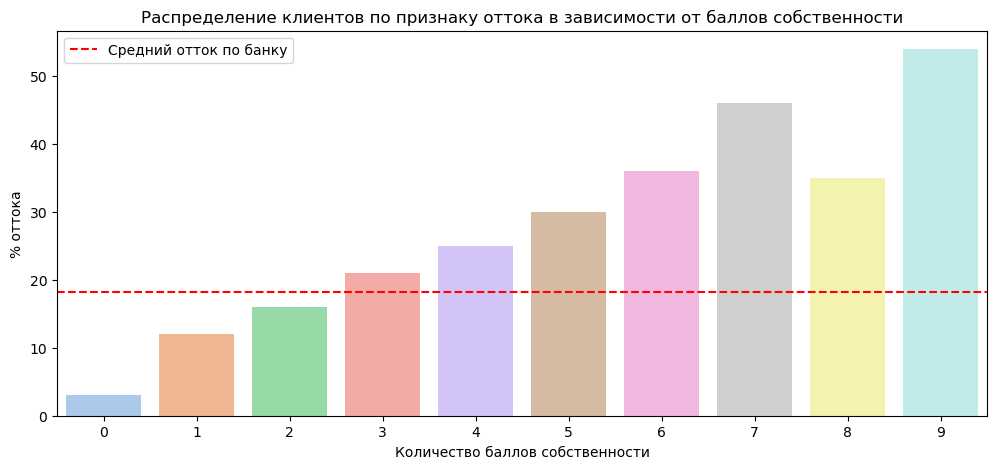

In [24]:
# готовим исходные данные
df_e= df.pivot_table(index='equity', columns='churn', values='userid', aggfunc='count').reset_index()
df_e['total'] = df_e[1] + df_e[0]
df_e['% оттока'] = round(df_e[1] / df_e['total']*100)
# строим диаграмму
sns.set_palette('pastel') 
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='equity', y='% оттока', data=df_e)
# вывод линии уровня среднего оттока по банку
plt.axhline (y=churn_rate, color='red', linestyle='--', label='Средний отток по банку')
plt.title('Распределение клиентов по признаку оттока в зависимости от баллов собственности')
plt.xlabel('Количество баллов собственности')
plt.legend(loc = 'upper left')
plt.show() 

Клиенты, у которых **3 и более объектов собственности**, чаще уходят из банка. Самый минимальная доля отточных пользователей среди клиентов без собственности.    
Далее проанализируем, в каких интервалах значений возраста пользователи более склонны к уходу. Для этого построим гистограмму.

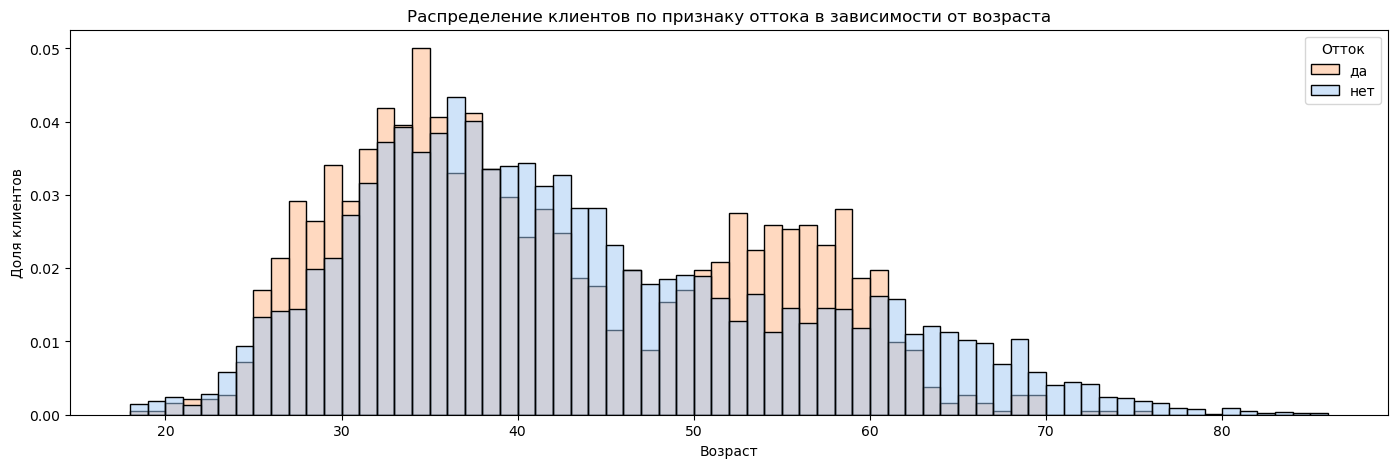

In [25]:
# построение гистограммы
sns.set_palette('pastel') 
plt.figure(figsize=(17, 5))
ax = sns.histplot(data = df, x='age', hue='churn', stat='density', common_norm=False, binwidth=1)
plt.title('Распределение клиентов по признаку оттока в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Доля клиентов')
plt.legend(title='Отток', loc='upper right', labels=['да', 'нет'])
plt.show() 

Согласно получившейся диаграмме, можно выделить два возрастных интервала, в которых пользователи более склонны к уходу из банка. Это от **25 до 35** лет и от **50 до 60** лет.    
Определим, в каких диапазонах кредитного скоринга клиенты уходят из банка чаще.

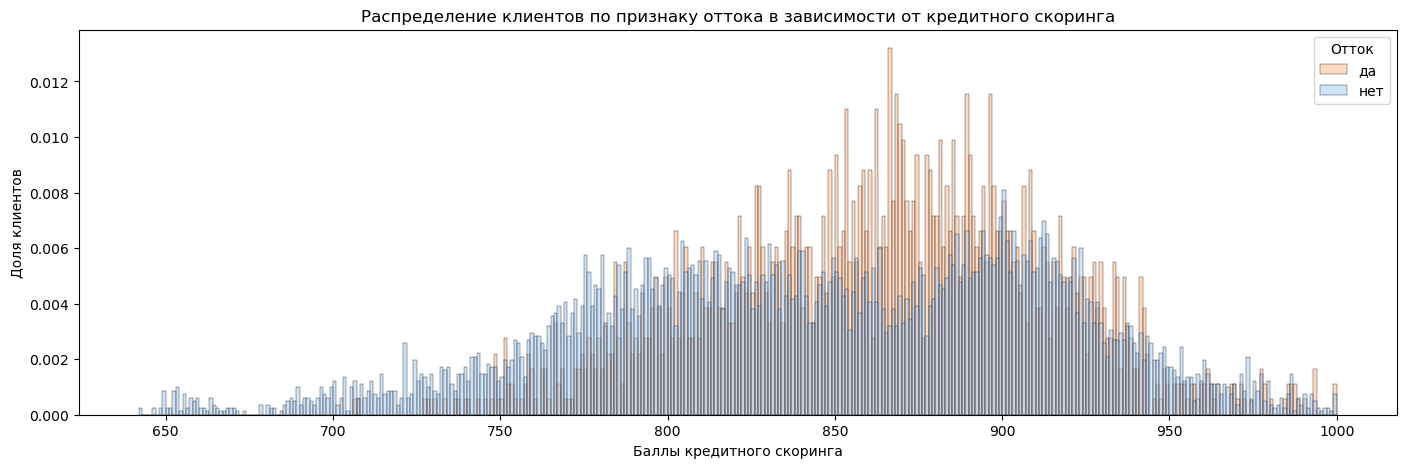

In [26]:
# построение гистограммы
sns.set_palette('pastel') 
plt.figure(figsize=(17, 5))
ax = sns.histplot(data = df, x='score', hue='churn', stat='density', common_norm=False, binwidth=1)
plt.title('Распределение клиентов по признаку оттока в зависимости от кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Доля клиентов')
plt.legend(title='Отток', loc='upper right', labels=['да', 'нет'])
plt.show() 

Наиболее очевидным диапазоном кредитного скоринга, в котором отток пользователей выше, - это от **830 до 900** кредитных баллов.   
Далее проанализируем, наиболее характерные для отточных клиентов диапазоны оценочного дохода. Построим для этого гистограмму.

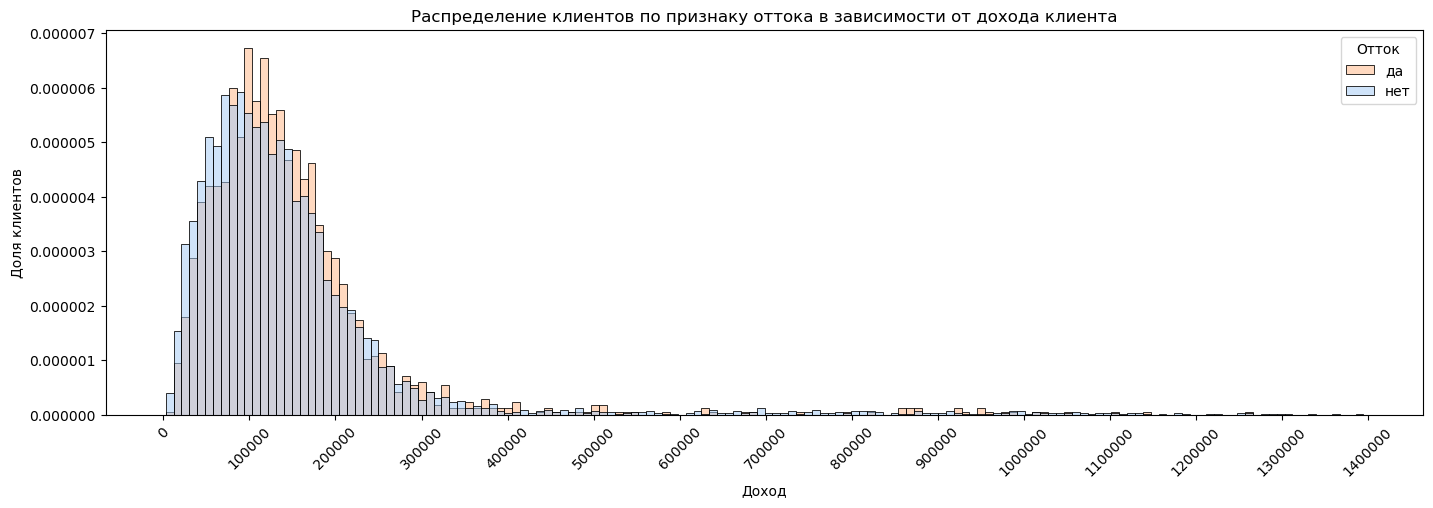

In [27]:
# построение гистограммы
sns.set_palette('pastel') 
plt.figure(figsize=(17, 5))
ax = sns.histplot(data = df, x='est_salary', hue='churn', stat='density', common_norm=False)
plt.title('Распределение клиентов по признаку оттока в зависимости от дохода клиента')
plt.xlabel('Доход')
plt.ylabel('Доля клиентов')
plt.legend(title='Отток', loc='upper right', labels=['да', 'нет'])
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
minor_ticks = np.arange(0, 1500000, 100000)
ax.set_xticks(minor_ticks)
plt.xticks(rotation=45)
plt.show() 

Первый вывод, который можно сделать по гистограмме, это то, что распределение клиентов по уровню дохода <u>не является нормальным</u>. Распределение имеет перекос вправо, что говорит о том, что часть (хоть и небольшая) клиентов имеют доход, существенно превышающий среднее значение в выборке.     
Укрупним диаграмму, ограничив значения по оси x от 60 000 до 220 000,чтобы более точно оценить границы оттока клиентов по признаку оценочного дохода.

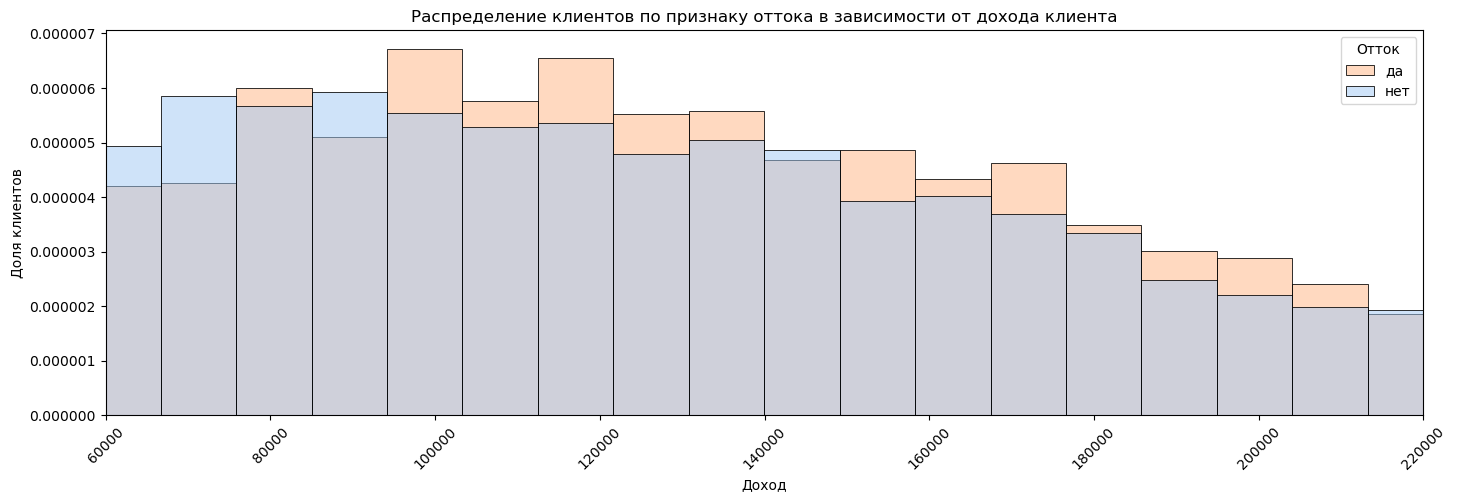

In [28]:
# построение гистограммы
sns.set_palette('pastel') 
plt.figure(figsize=(17, 5))
ax = sns.histplot(data = df, x='est_salary', hue='churn', stat='density', common_norm=False)
plt.title('Распределение клиентов по признаку оттока в зависимости от дохода клиента')
plt.xlabel('Доход')
plt.ylabel('Доля клиентов')
plt.legend(title='Отток', loc='upper right', labels=['да', 'нет'])
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_xlim([60000, 220000])
plt.xticks(rotation=45)
plt.show() 

Второй вывод из представленной выше гистограммы - это то, что клиенты банка, доход которых оценивается от **100 до 210** тысяч, более склонны к уходу.   
Следующим шагом является анализ распределения клиентов по признаку оттока в зависимости от баланса на счете. Для этого построим гистограмму.

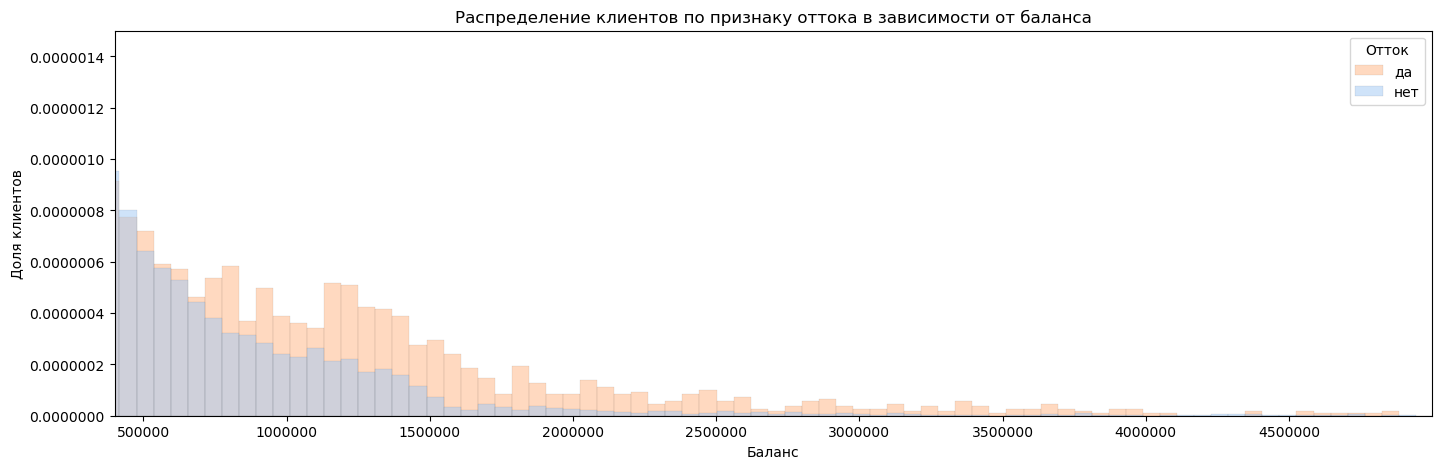

In [29]:
# построение гистограммы
sns.set_palette('pastel') 
plt.figure(figsize=(17, 5))
ax = sns.histplot(data = df, x='balance', hue='churn', stat='density', common_norm=False, bins=2000)
plt.title('Распределение клиентов по признаку оттока в зависимости от баланса')
plt.xlabel('Баланс')
plt.ylabel('Доля клиентов')
plt.legend(title='Отток', loc='upper right', labels=['да', 'нет'])
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
minor_ticks = np.arange(500000, 5000000, 500000)
ax.set_xlim([400000, 5000000])
ax.set_xticks(minor_ticks)
ax.set_ylim([0, 0.0000015])
plt.show() 

В связи с тем, что в данных о балансе есть существенные выбросы, гистограмма была укрупнена до 0,00015% по оси y и от 400 000 до 5 000 000 по оси x. Данные на гистограмме свидетельствуют о том, что более всего склонны к уходу пользователи, баланс которых выше **500 000**.

Резюмируя проведенный выше анализ, сформируем типичные **портреты клиентов** в разрезе оттока. Для этого создадим сводную таблицу, в столбцах которой находятся отточные и лояльные клиенты, а значения характеризуют наиболее типичные признаки таких пользователей. По количественным признакам в таблицу войдут средние значения признаков (медиана), а по качественным - наиболее часто встречающееся значение (мода). По количественным признакам также выведем относительную разницу между группами клиентов по оттоку.

In [30]:
# группируем данные
ch_num = df.groupby('churn').agg({'est_salary':'median', 'balance':'median', 'age':'median', 'products':'median', 'equity':'median', 'score': 'median'})
ch_num = ch_num.T
ch_num['Разница, %'] = round((ch_num[1]/ch_num[0]-1)*100,2)
ch_cat = df.groupby('churn')[['city', 'gender', 'credit_card', 'last_activity']].agg(lambda x:x.value_counts().index[0])
ch_cat = ch_cat.T
ch = pd.concat([ch_num, ch_cat])
ch.columns = ['Не отток','Отток', 'Разница, %']
ch.fillna('')

,Не отток,Отток,"Разница, %"
est_salary,"118,227.60","125,408.88",6.07
balance,"321,642.56","775,399.47",141.07
age,40.00,39.00,-2.50
products,2.00,2.00,0.00
equity,3.00,4.00,33.33
score,848.00,866.00,2.12
city,Ярославль,Ярославль,
gender,Ж,М,
credit_card,1,1,
last_activity,0,1,


Данные в сформированной сводной таблице подтверждают сделанные с помощью графиков выводы. Самые существенные расхождения между группами клиентов по оттоку наблюдаются в балансе на счете и оценочном доходе. Причем расхождения в пользу отточных клиентов. То есть банк теряет много клиентов именно со значительным остатком на счете и приличным уровнем заработной платы.    

Необходимо отметить, что значения признака наличия кредитной карты разнятся с точки зрения оттока при проведении исследовательского анализа данных и формирования портрета пользователя. Дело в том, что процент оттока выше у пользователей, которые не имеют кредитной карты, что и подтверждается построенной ранее диаграммой. Однако среди тех, кто уходит, больше клиентов, у которых кредитная карта имеется, как и у остающихся клиентов. Поэтому для целей сегментации пользователей по оттоку будем использовать значение данного признака как "отсутствие кредитной карты".

Для оценки взаимосвязи признаков клиентов банка (в части оттока) проведем корреляционный анализ данных. Для анализа будем использовать метод библиотеки phik.

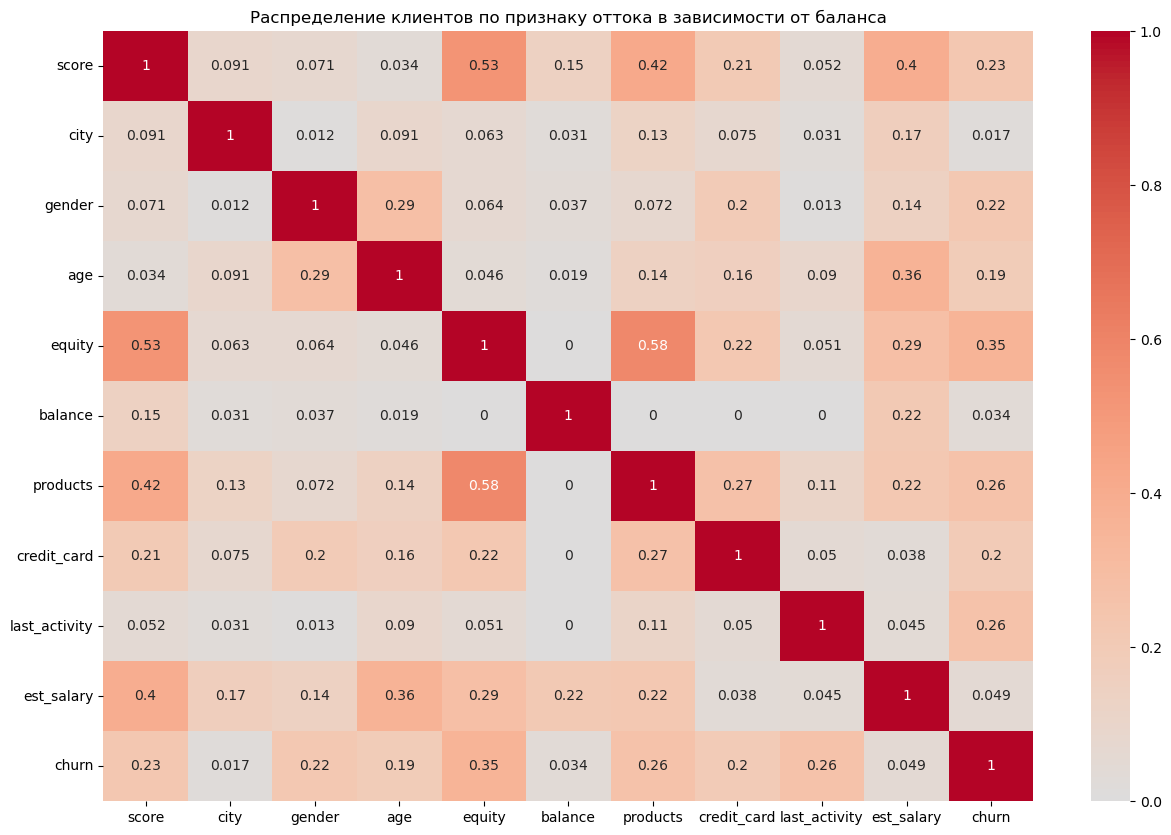

In [31]:
# делаем копию датасета и удаляем из него идентификаторы пользователя, так как по этому показателю не будем определять взаимосвязи
df.drop('na_balance', axis= 1 , inplace= True )
df_matrix = df.copy()
df_matrix.drop(df.columns [[0]], axis= 1 , inplace= True )
# создаем корреляционную матрицу с использованием метода библиотеки phik
corr_matrix = df_matrix.phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])
# видуализируем матрицу с помощью тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, center= 0, cmap= 'coolwarm')
plt.title('Распределение клиентов по признаку оттока в зависимости от баланса')
plt.show()

Согласно сформированной корреляционной матрице самые сильные взаимосвязи между признаками клиентов наблюдаются между  количеством объектов собственности и количеством банковских продуктов. Уровень корреляции между данными признаками составляет 0,58. По шкале Чеддока такая корреляция характеризуется как заметная. На втором месте по взаимосвязи находятся такие признаки как кредитный скоринг и количество объектов собственности (0,53 - заметная корреляция). Тут вполне все логично: наиболее обеспеченные клиенты имеют большее число объектов собственности, пользуются большим количеством продуктов банка и имеют более высокий кредитный рейтинг.   

Что касается взаимосвязи признака оттока клиентов с другими признаками, то наиболее высокая взаимосвязь определяется с количеством объектов собственности (0,35 - умеренная корреляция по Чеддоку). Также можно выделить такие признаки, как активность и количество продуктов, которые имеют уровень взаимосвязи с признаком оттока клиентов 0,26, что по шкале Чеддока характеризуется как слабая взаимосвязь. Остальные признаки пользователей показывают еще меньший уровень корреляции с показателем оттока.

## Проверка статистических гипотез

При формировании портретов пользователей по показателю оттока было определено, что самые существенные расхождения между группами клиентов по оттоку наблюдаются в балансе на счете и оценочном доходе. Проверим, являются ли данные расхождения статистически значимыми, проверив гипотезу о различии уровня дохода между ушедшими и лояльными банку клиентами и гипотезу о различии значений баланса между ушедшими и лояльными банку клиентами.

<div style="border:solid orange 3px; padding: 20px; border-radius: 10px">
Гипотеза 1. Гипотеза о различии уровня дохода между ушедшими и лояльными банку клиентами

Сформулируем гипотезы для проверки.    

**Ho** - Нулевая гипотеза: средние значения дохода ушедших и остающихся пользователей равны.    
**H1** - Альтернативная гипотеза: средние значения дохода ушедших и остающихся пользователей не равны.

В качестве выборок для проверки гипотез возьмем данные об оценочном доходе ушедших и оставшихся клиентов.
Чтобы определить, какой статистический тест использовать для проверки гипотез, необходимо понимать, как распределены данные о доходах пользователей. Ранее при построении гистограммы распределения доходов пользователей, было отмечено, что распределение не является нормальным и имеет правый "хвост". Подтвердим это, выполнив тест Левена.

Уровень статистической значимости - 5%


In [32]:
alpha = 0.05 # уровень статистической значимости

# формируем выборки с заработными платами оставшихся и ушедших пользователей
stay = df.loc[df['churn'] == 0]['est_salary']
churn = df.loc[df['churn'] == 1]['est_salary']

# проводим тест Левена для двух выборок
results = st.levene(stay, churn)

print(f'p-value: {results.pvalue}')
# проверяем p-value
if results.pvalue < alpha:
    print('Распределение не является нормальным')
else:
    print('Это нормальное распределение')



p-value: 0.009876226357398874
Распределение не является нормальным


Тест Левена подтверждает, что распределение данных о доходах пользователей не является нормальным. Соответственно, для статистической проверки гипотезы о различиях в доходах ушедших и лояльных пользователей будет использоваться тест Манна - Уитни.
Уровень статистической значимости - 5%.


In [33]:
# проводим тест Манна - Уитни для двух выборок
results = st.mannwhitneyu(stay, churn, alternative = 'two-sided')

print(f'p-value: {results.pvalue}')
# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 0.00016830729188229058
Отвергаем нулевую гипотезу


Таким образом, нулевая гипотеза о равенстве средних значений оценочного дохода между ушедшими и остающимися пользователями отклонена. Различия в доходах между группами клиентов по оттоку являются статистически значимыми.

<div style="border:solid orange 3px; padding: 20px; border-radius: 10px">
Гипотеза 2. Гипотеза о различии значений баланса между ушедшими и лояльными банку клиентами

Сформулируем гипотезы для проверки.    

**Ho** - Нулевая гипотеза: средние значения баланса ушедших и остающихся пользователей равны.    
**H1** - Альтернативная гипотеза: средние значения баланса ушедших и остающихся пользователей не равны.

В качестве выборок для проверки гипотез возьмем данные о балансе ушедших и оставшихся клиентов.
Чтобы определить, какой статистический тест использовать для проверки гипотез, необходимо понимать, как распределены данные о балансе пользователей. Для этого выполним тест Левена.

Уровень статистической значимости - 5%


In [34]:
alpha = 0.05 # уровень статистической значимости

# формируем выборки с балансом оставшихся и ушедших пользователей
stay_b = df.loc[df['churn'] == 0]['balance']
churn_b = df.loc[df['churn'] == 1]['balance']

# проводим тест Левена для двух выборок
results = st.levene(stay_b, churn_b)

print(f'p-value: {results.pvalue}')
# проверяем p-value
if results.pvalue < alpha:
    print('Распределение не является нормальным')
else:
    print('Это нормальное распределение')

p-value: 1.4112457005380196e-13
Распределение не является нормальным


Данное распределение, как и распределение оценочных доходов пользователей, не является нормальным. Поэтому для статистической проверки гипотез будет использоваться тест Манна - Уитни.    
Уровень статистической значимости - 5%.

In [35]:
# проводим тест Манна - Уитни для двух выборок
results = st.mannwhitneyu(stay_b, churn_b, alternative = 'two-sided')

print(f'p-value: {results.pvalue}')
# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 1.447295925472958e-193
Отвергаем нулевую гипотезу


Таким образом, нулевая гипотеза о равенстве средних значений баланса между ушедшими и остающимися пользователями отклонена. Различия в доходах между группами клиентов по оттоку являются статистически значимыми.

## Выводы по результатам исследовательского анализа, корреляционного анализа и проверки статистических гипотез

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

В ходе исследовательского анализа данных были определены значения признаков, которые чаще всего встречаются среди клиентов, уходящих из банка:    
* **Пол:** Мужчина    
* **Возраст:** 25-35 лет, 50-60 лет    
* **Город:** Ростов, Ярославль    
* **Кредитная карта:** нет    
* **Активность:** есть    
* **Количество банковских продуктов:** 2 и больше    
* **Количество объектов собственности:** 3 и больше    
* **Кредитные баллы:** 830-900    
* **Оценочный доход:** 100 000-210 000    
* **Баланс:** более 500 000

Также был проведен корреляционный анализ между всеми признаками клиентов банка. Сильной взаимосвязи между признаками выявлено не было. Уровень оттока наиболее связан с количеством объектов собственности, а также с активностью и количеством продуктов, что еще раз подтверждает выводы, сделанные в ходе исследовательского анализа.   

Кроме того, был составлен профиль уходящих из банка и лояльных пользователей по средним или часто встречающимся значениям признаков пользователей. По портретам пользователей были выделены основные количественные отличия между лояльными и уходящими пользователями. Это оценочный доход и баланс пользователей. Статистическая значимость таких отличий была определена путем статистической проверки гипотез. В ходе проверки гипотез было определено, что существуют **статистически значимые** различия в оценочных доходах и балансе между группами пользователей по признаку оттока.    
     
Значения признаков уходящих из банка клиентов, определенные по результатам исследовательского анализа, корреляционного анализа и проверки статистических гипотез, могут быть использованы для определения сегментов клиентов, которые склонны уходить из банка.

## Сегментация клиентов, которые склонны уходить из банка

Используя значения признаков отточных пользователей, определенных по результатам исследовательского анализа, корреляционного анализа и проверки статистических гипотез, сформируем три сегмента клиентов, которые имеют склонность к оттоку.

<div style="border:solid orange 3px; padding: 20px; border-radius: 10px">
    
<b>Сегмент 1:</b>   
    
Мужчины от 25 до 35 лет с оценочным доходом от 100 000 до 210 000.    

In [36]:
# формирование выборки по первому сегменту
s_one = df.loc[(df['gender'] == 'М') & (df['age']>=25) & (df['age']<=35) & (df['est_salary']>=100000)& (df['est_salary']<=210000)]
print('Количество пользователей в первом сегменте:', s_one.shape[0])
print('Количество уходящих пользователей в первом сегменте:', s_one.loc[s_one['churn'] == 1]['userid'].count())

Количество пользователей в первом сегменте: 730
Количество уходящих пользователей в первом сегменте: 217


Оценим уровень оттока в первом сегменте, построив круговую диаграмму.

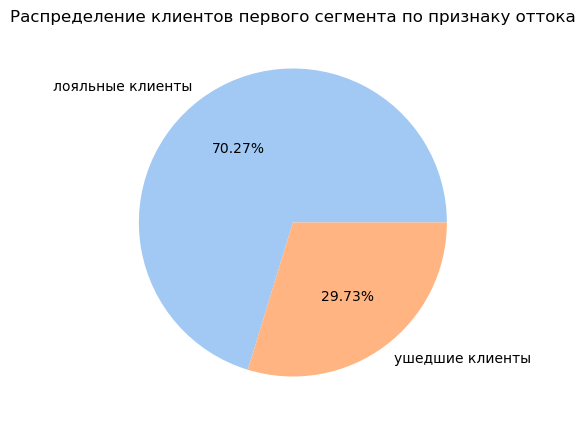

In [37]:
# подготовка исходных данных
one_c= s_one.groupby('churn')['userid'].count().reset_index()
one_c['churn'].replace({1: 'ушедшие клиенты', 0 : 'лояльные клиенты'}, inplace=True)
# построение круговой диаграммы
plt.figure(figsize=(12, 5))
color = sns.color_palette('pastel') 
plt.pie(one_c['userid'], labels=one_c['churn'], colors=color, autopct='%.2f%%') 
plt.title('Распределение клиентов первого сегмента по признаку оттока') 
plt.show() 

Уровень оттока в первом сегменте составляет 29,73%, что превышает показатель среднего оттока по банку (18,23%).

<div style="border:solid orange 3px; padding: 20px; border-radius: 10px">
    
<b>Сегмент 2:</b>   
    
Мужчины с кредитным скорингом от 830 до 900 и балансом свыше 500 000.    

In [38]:
# формирование выборки по второму сегменту
s_two = df.loc[(df['gender'] == 'М') & (df['score']>=830) & (df['score']<=900) & (df['balance']>=500000)]
print('Количество пользователей во втором сегменте:', s_two.shape[0])
print('Количество уходящих пользователей во втором сегменте:', s_two.loc[s_two['churn'] == 1]['userid'].count())

Количество пользователей во втором сегменте: 902
Количество уходящих пользователей во втором сегменте: 392


Оценим уровень оттока во втором сегменте, построив круговую диаграмму.

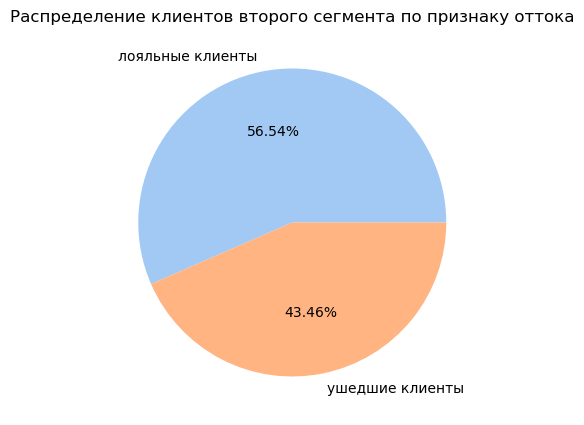

In [39]:
# подготовка исходных данных
one_t= s_two.groupby('churn')['userid'].count().reset_index()
one_t['churn'].replace({1: 'ушедшие клиенты', 0 : 'лояльные клиенты'}, inplace=True)
# построение круговой диаграммы
plt.figure(figsize=(12, 5))
color = sns.color_palette('pastel') 
plt.pie(one_t['userid'], labels=one_t['churn'], colors=color, autopct='%.2f%%') 
plt.title('Распределение клиентов второго сегмента по признаку оттока') 
plt.show() 

Уровень оттока во втором сегменте составляет 43,46%, что существенно превышает показатель среднего оттока по банку (18,23%).

<div style="border:solid orange 3px; padding: 20px; border-radius: 10px">
    
<b>Сегмент 3:</b>   
    
Клиенты из Ярославля, не имеющие кредитную карту, но имеющие 3 и более объектов собственности.    

In [40]:
# формирование выборки по третьему сегменту
s_three = df.loc[(df['city'] == 'Ярославль') & (df['credit_card']==0) & (df['equity']>=3)]
print('Количество пользователей в третьем сегменте:', s_three.shape[0])
print('Количество уходящих пользователей в третьем сегменте:', s_three.loc[s_three['churn'] == 1]['userid'].count())

Количество пользователей в третьем сегменте: 1131
Количество уходящих пользователей в третьем сегменте: 415


Оценим уровень оттока в третьем сегменте, построив круговую диаграмму.

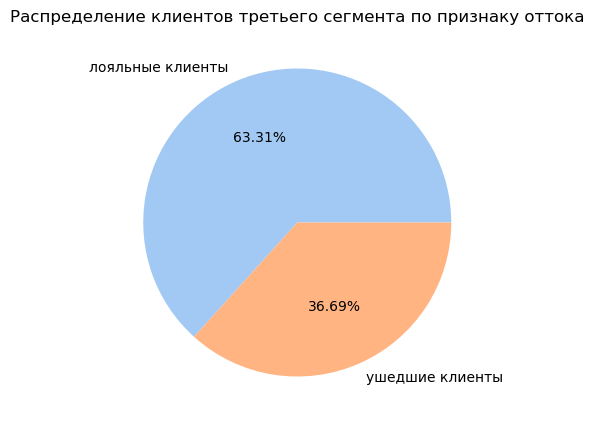

In [41]:
# подготовка исходных данных
one_th= s_three.groupby('churn')['userid'].count().reset_index()
one_th['churn'].replace({1: 'ушедшие клиенты', 0 : 'лояльные клиенты'}, inplace=True)
# построение круговой диаграммы
plt.figure(figsize=(12, 5))
color = sns.color_palette('pastel') 
plt.pie(one_th['userid'], labels=one_th['churn'], colors=color, autopct='%.2f%%') 
plt.title('Распределение клиентов третьего сегмента по признаку оттока') 
plt.show() 

Уровень оттока в третьем сегменте составляет 36,69%, что в два раза превышает показатель среднего оттока по банку (18,23%).

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
Таким образом, были выделены 3 сегмента пользователей, показатель оттока в которых выше среднего уровня оттока по банку.    

## Приоритизация сегментов

Для того чтобы выполнить приоритизацию сегментов, консолидируем данные по сегментам.

In [42]:
#построение сводной таблицы по сегментам
segments =  pd.concat([s_one.pivot_table(columns='churn',values='userid', aggfunc='count').reset_index(), s_two.pivot_table(columns='churn',values='userid', aggfunc='count').reset_index(), s_three.pivot_table(columns='churn',values='userid', aggfunc='count').reset_index()]).reset_index(drop=True)
segments.loc[0,'index'] = 'Сегмент 1'
segments.loc[1,'index'] = 'Сегмент 2'
segments.loc[2,'index'] = 'Сегмент 3'
segments.columns = ['Сегмент', 'Не отток','Отток']
segments['% оттока'] = round(segments['Отток']/(segments['Отток']+segments['Не отток'])*100,2)
segments

,Сегмент,Не отток,Отток,% оттока
0,Сегмент 1,513,217,29.73
1,Сегмент 2,510,392,43.46
2,Сегмент 3,716,415,36.69


1) Первым по приоритету обозначим **сегмент 2** (мужчины с кредитным скорингом от 830 до 900 и балансом свыше 500 000), так как уровень оттока по данному сегменту самый большой, превышение среднего уровня по банку более чем в два раза. 

2) Следующим по приоритету является **сегмент 3** (клиенты из Ярославля, не имеющие кредитную карту, но имеющие 3 и более объектов собственности). Уровень оттока в данном сегменте превышает средний уровень по банку в два раза. Кроме того, абсолютное количество отточных клиентов в данном сегменте больше.  

3) На третьем месте **сегмент 1** (мужчины от 25 до 35 лет с оценочным доходом от 100 000 до 210 000), в котором уровень оттока клиентов превышает средний по банку уровень в 1,5 раза.

## Рекомендации по работе с сегментами

Для дальнейшей работы по удержанию клиентов, склонных к уходу, в разрезе выделенных сегментов можно дать следующие рекомендации.

<div style="border:solid black 3px; padding: 20px; border-radius: 10px">

**Сегмент 2. Мужчины с кредитным скорингом от 830 до 900 и балансом свыше 500 000**  

Данный сегмент составляют клиенты со значительным уровнем баланса и хорошей кредитной историей. Это достаточно состоятельные клиенты, заинтересованные получать доход от своих вложений. Причиной ухода может служить недостаточно привлекательные условия по вкладам относительно конкурентов. Поэтому для удержания таких клиентов можно использовать предложение <u>более высокой процентной ставки по вкладам</u> при определенном сроке и размере вклада (например, размер вклада более 500 000, срок более 6 мес).  

Кроме материального аспекта удержания клиентов можно также использовать нематериальный. Для пользователей из данного сегмента можно ввести так называемый <u>приват банкинг</u>, закрепив за такими клиентами VIP статус и назначив персонального менеджера.


<div style="border:solid black 3px; padding: 20px; border-radius: 10px">

**Сегмент 3. Клиенты из Ярославля, не имеющие кредитную карту, но имеющие 3 и более объектов собственности**

Данный сегмент составляют клиенты, проживающие в конкретном городе - Ярославле, не пользующиеся кредитной картой и имеющие несколько объектов собственности (в том числе, скорее всего, автомобиль). Для удержания таких клиентов можно применить такую тактику удержания клиентов из данного сегмента, как предоставление <u>скидок на услуги и товары в сети партнеров банка в городе Ярославль</u>.    

Также можно предложить данным клиентам <u>повышенный кэшбэк</u> при оплате картой банка товаров и услуг в сети партнеров банка в городе Ярославль (к примеру, на заправочных станциях).

<div style="border:solid black 3px; padding: 20px; border-radius: 10px">

**Сегмент 1. Мужчины от 25 до 35 лет с оценочным доходом от 100 000 до 210 000**  

Данный сегмент составляют молодые мужчины с хорошим, но не слишком высоким доходом. Такой доход позволяет комфортно делать некрупные покупки, но для крупных приобретений данного уровня дохода недостаточно. В возрасте 25-35 лет большинство мужчин заводят семью, что предполагает необходимость в приобретении жилья и автомобиля. Для таких крупных покупок могут потребоваться кредитные средства. Поэтому для удержания пользователей из данного сегмента лучшим решением будет предложить им более <u>привлекательные условия по кредитам, в том числе ипотечным</u>.   
    

## Вывод

<div style="border:solid green 3px; padding: 20px; border-radius: 10px">

*Целью* настоящего проекта являлся анализ признаков, характерных для уходящих из банка клиентов, и разработка рекомендаций по их удержанию. 
    
Для анализа были использованы данные о почти *десяти тысячах клиентов* банка.     

В ходе исследования были выявлены значения признаков клиентов, наиболее склонных к уходу. С помощью комбинации таких значений характеристик пользователей были сформированы *три сегмента* клиентов банка, доля оттока в которых существенно выше среднего уровня по банку.    
    
По каждому из выделенных сегментов были даны *рекомендации* относительно мероприятий по удержанию.    